Bonjour, 

Merci pour ton aide sur ce projet !

Ta mission est de réaliser, dans une première itération, une étude de faisabilité d'un moteur de classification d'articles, basé sur une image et une description, pour l'automatisation de l'attribution de la catégorie de l'article.

Tu dois analyser les descriptions textuelles et les images des produits, au travers des étapes suivantes : 

Un prétraitement des données texte ou image suivant le cas ;
Une extraction de features ;
Une réduction en 2 dimensions, afin de projeter les produits sur un graphique 2D, sous la forme de points dont la couleur correspondra à la catégorie réelle ;
Analyse du graphique afin d’en déduire ou pas, à l’aide des descriptions ou des images, la faisabilité de regrouper automatiquement des produits de même catégorie ;
Réalisation d’une mesure pour confirmer ton analyse visuelle, en calculant la similarité entre les catégories réelles et les catégories issues d’une segmentation en clusters.
Pourrais-tu nous démontrer, par cette approche, la faisabilité de regrouper automatiquement des produits de même catégorie ?

Voici les contraintes : 

Afin d’extraire les features texte, il sera nécessaire de mettre en œuvre : 
- deux approches de type “bag-of-words” ;
- comptage simple de mots et Tf-idf ;
- une approche de type word/sentence embedding classique avec Word2Vec (ou Glove ou FastText) ;
- une approche de type word/sentence embedding avec BERT ;
- une approche de type word/sentence embedding avec USE (Universal Sentence Encoder). 

En pièce jointe, tu trouveras un exemple de mise en œuvre de ces approches d’extraction de features texte sur un autre dataset. Je t’invite à l’utiliser comme point de départ, cela va te faire gagner beaucoup de temps !

Afin d’extraire les features image, il sera nécessaire de mettre en œuvre :
un algorithme de type SIFT / ORB / SURF ;
un algorithme de type CNN Transfer Learning.
Concernant l’approche de type SIFT, je t’invite à regarder le webinaire que nous avons réalisé, disponible dans les ressources.

En pièces jointes, tu trouveras un exemple de mise en œuvre de l’approche de type CNN Transfer Learning d’extraction de features images sur un autre dataset. Je t’invite à l’utiliser comme point de départ, cela va te faire gagner beaucoup de temps !

Merci encore, 

Linda

PS : J’ai bien vérifié qu’il n’y avait aucune contrainte de propriété intellectuelle sur les données et les images.

## 1 Prétraitement des données 

      1.1 création de tokens
    - 1.2 suppression de la ponctuation (stop words)
    - 1.3 racinisation du mots 
 
## 2 Bag of words avec TF-IDF

## 3 Faisabilté de la classification du texte 
    - 3.1Comparaison des données avec T-SNE
    - 3.2Test de classification avec grid search cv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import time

%matplotlib inline
import os
from os import listdir
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve
from glob import glob


In [2]:
df = pd.read_csv('Source/flipkart_com-ecommerce_sample_1050.csv',sep=',')

In [3]:
path_img = 'Source/Images'

In [4]:
df.head(3)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."


In [5]:
df.dtypes

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
dtype: object

In [6]:
df.isna().mean()

uniq_id                    0.000000
crawl_timestamp            0.000000
product_url                0.000000
product_name               0.000000
product_category_tree      0.000000
pid                        0.000000
retail_price               0.000952
discounted_price           0.000952
image                      0.000000
is_FK_Advantage_product    0.000000
description                0.000000
product_rating             0.000000
overall_rating             0.000000
brand                      0.321905
product_specifications     0.000952
dtype: float64

<AxesSubplot:>

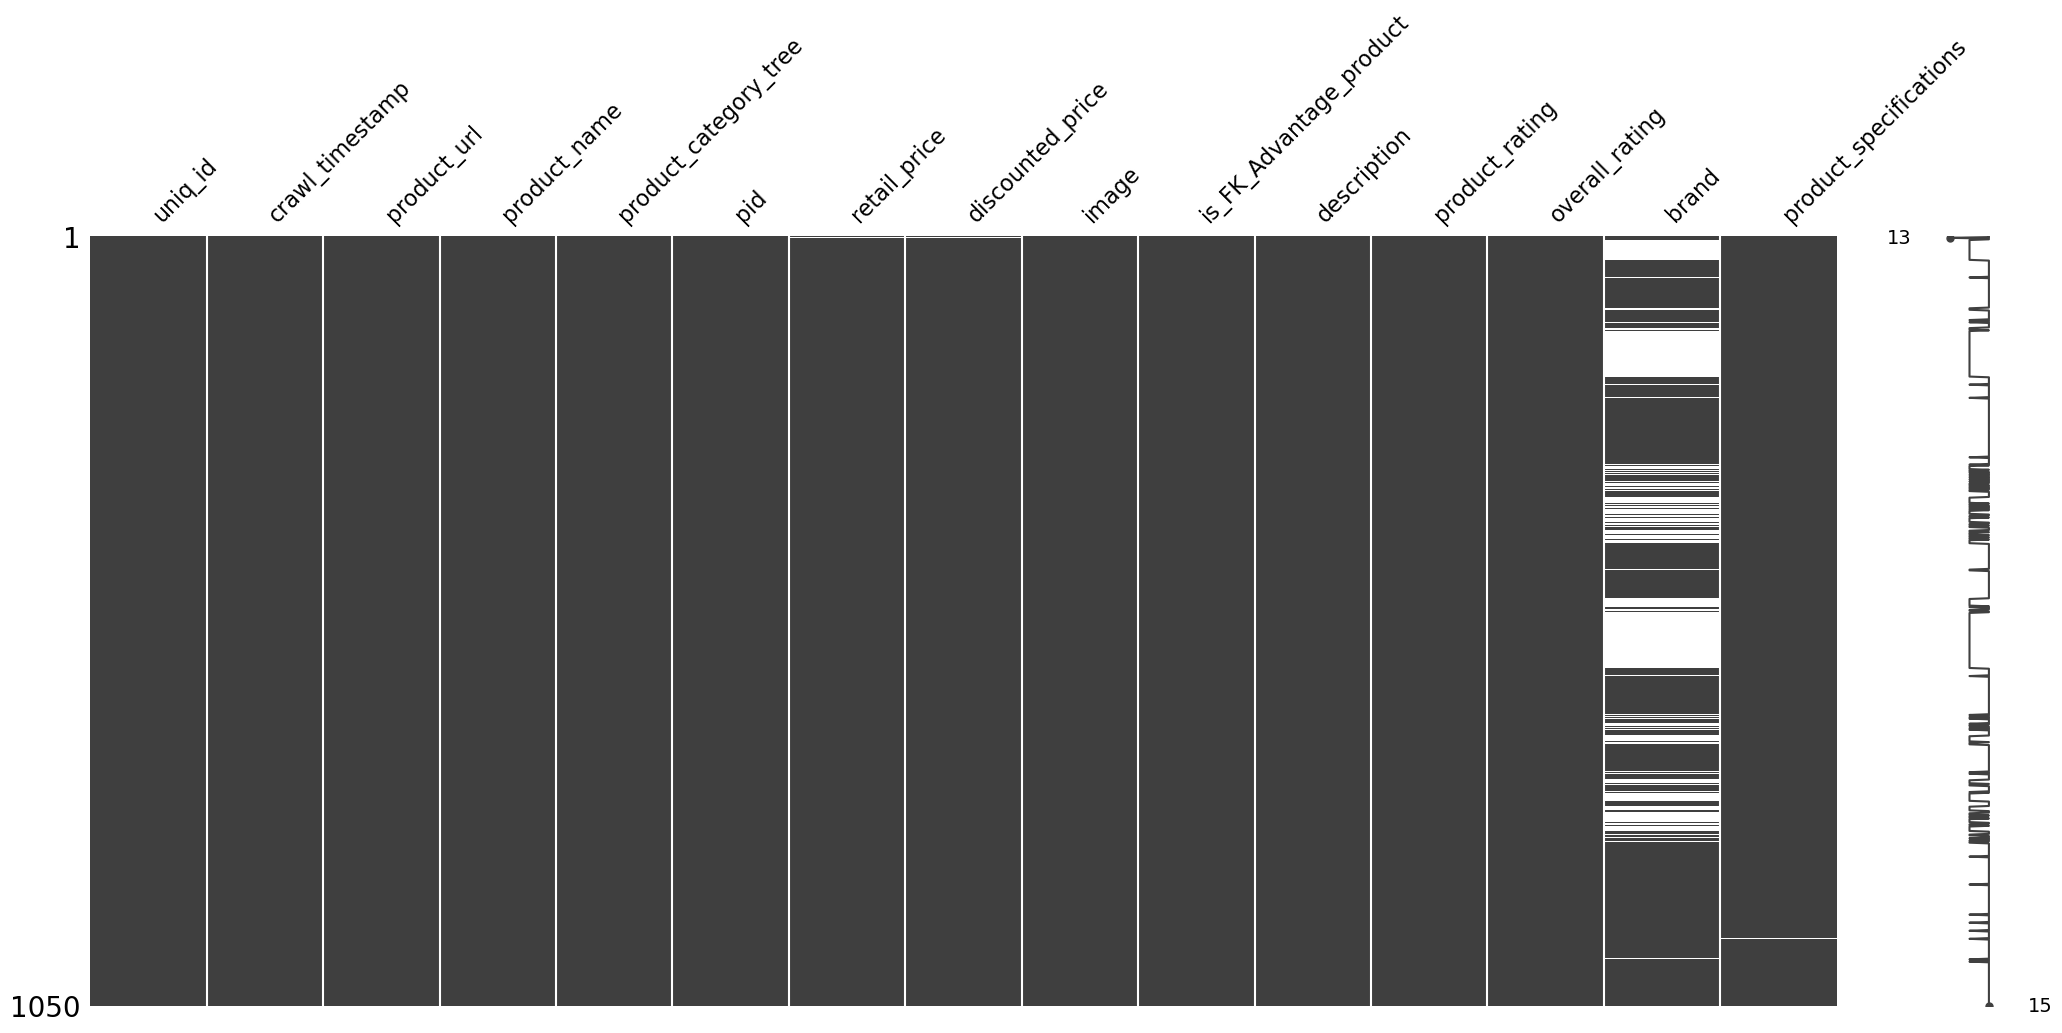

In [7]:
msno.matrix(df)

In [8]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [9]:
# affiche l'url pour visionner l'image du produit

df.product_url[0]

'http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z'

In [10]:
df.product_url[1]

'http://www.flipkart.com/sathiyas-cotton-bath-towel/p/itmegfzhxbyucwgn?pid=BTWEGFZHGBXPHZUH'

In [11]:
# premier notebook NLP 40 % 
# deux parties : texte (données non structurées)
# deuxième notebook image 40 % 

cols = ['product_name',
        'product_category_tree',
        'description',
        'brand']

df_texte = df.loc[:,cols]
df_texte

,product_name,product_category_tree,description,brand
0,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",Key Features of Elegance Polyester Multicolor ...,Elegance
1,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Specifications of Sathiyas Cotton Bath Towel (...,Sathiyas
2,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Key Features of Eurospa Cotton Terry Face Towe...,Eurospa
3,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",Key Features of SANTOSH ROYAL FASHION Cotton P...,SANTOSH ROYAL FASHION
4,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",Key Features of Jaipur Print Cotton Floral Kin...,Jaipur Print
...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Oren Empower Extra Large Self Adhesive Sticker...,Oren Empower
1046,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Wallmantra Large Vinyl Sticker Sticker (Pack o...,Wallmantra
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Uberlyfe
1048,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Wallmantra


## 1. Pretraitement des données textes


In [12]:
# extraire la première catégorie exemple 'Kitchen & Dining' et la deuxième catégorie 
# analyse les fréquences de la target 
# 
token = np.array(df_texte.product_category_tree)
token

array(['["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]',
       '["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]',
       '["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA..."]',
       ...,
       '["Baby Care >> Baby & Kids Gifts >> Stickers >> Uberlyfe Stickers"]',
       '["Baby Care >> Baby & Kids Gifts >> Stickers >> Wallmantra Stickers"]',
       '["Baby Care >> Baby & Kids Gifts >> Stickers >> Uberlyfe Stickers"]'],
      dtype=object)

### 1.1 Création de token

In [13]:
len(token)

1050

In [14]:
# lire des caractère sur une image
import nltk

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dragomir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
tokenizer = nltk.RegexpTokenizer(r'\w+')

In [17]:
token = [tokenizer.tokenize(i.lower()) for i in token]

In [18]:
bigram = [list(nltk.bigrams(bigram)) for bigram in token]

In [19]:
bigram[0][0]

('home', 'furnishing')

In [20]:
token_bigram = pd.Series(bigram)
token_bigram

0       [(home, furnishing), (furnishing, curtains), (...
1       [(baby, care), (care, baby), (baby, bath), (ba...
2       [(baby, care), (care, baby), (baby, bath), (ba...
3       [(home, furnishing), (furnishing, bed), (bed, ...
4       [(home, furnishing), (furnishing, bed), (bed, ...
                              ...                        
1045    [(baby, care), (care, baby), (baby, kids), (ki...
1046    [(baby, care), (care, baby), (baby, kids), (ki...
1047    [(baby, care), (care, baby), (baby, kids), (ki...
1048    [(baby, care), (care, baby), (baby, kids), (ki...
1049    [(baby, care), (care, baby), (baby, kids), (ki...
Length: 1050, dtype: object

In [21]:
cat_name = np.array([token_bigram[i][0] for i in range(len(token_bigram))])

In [22]:
df_texte

,product_name,product_category_tree,description,brand
0,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",Key Features of Elegance Polyester Multicolor ...,Elegance
1,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Specifications of Sathiyas Cotton Bath Towel (...,Sathiyas
2,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Key Features of Eurospa Cotton Terry Face Towe...,Eurospa
3,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",Key Features of SANTOSH ROYAL FASHION Cotton P...,SANTOSH ROYAL FASHION
4,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",Key Features of Jaipur Print Cotton Floral Kin...,Jaipur Print
...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Oren Empower Extra Large Self Adhesive Sticker...,Oren Empower
1046,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Wallmantra Large Vinyl Sticker Sticker (Pack o...,Wallmantra
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Uberlyfe
1048,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Wallmantra


In [23]:
# 6 classes sont réalisées

df_token = pd.DataFrame(cat_name, columns=['cat1','cat2'])
df_token.loc[df_token.cat1 == 'baby','cat1'] = 'baby_care'
df_token = df_token.cat1

In [24]:
df_texte['category_name'] = df_token

In [25]:
df_texte.head(10)

,product_name,product_category_tree,description,brand,category_name
0,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",Key Features of Elegance Polyester Multicolor ...,Elegance,home
1,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Specifications of Sathiyas Cotton Bath Towel (...,Sathiyas,baby_care
2,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Key Features of Eurospa Cotton Terry Face Towe...,Eurospa,baby_care
3,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",Key Features of SANTOSH ROYAL FASHION Cotton P...,SANTOSH ROYAL FASHION,home
4,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",Key Features of Jaipur Print Cotton Floral Kin...,Jaipur Print,home
5,Maserati Time R8851116001 Analog Watch - For ...,"[""Watches >> Wrist Watches >> Maserati Time Wr...",Maserati Time R8851116001 Analog Watch - For ...,NaN,watches
6,"Camerii WM64 Elegance Analog Watch - For Men,...","[""Watches >> Wrist Watches >> Camerii Wrist Wa...","Camerii WM64 Elegance Analog Watch - For Men,...",NaN,watches
7,T STAR UFT-TSW-005-BK-BR Analog Watch - For Boys,"[""Watches >> Wrist Watches >> T STAR Wrist Wat...",T STAR UFT-TSW-005-BK-BR Analog Watch - For B...,NaN,watches
8,"Alfajr WY16B Youth Digital Watch - For Men, Boys","[""Watches >> Wrist Watches >> Alfajr Wrist Wat...","Alfajr WY16B Youth Digital Watch - For Men, B...",NaN,watches
9,TAG Heuer CAU1116.BA0858 Formula 1 Analog Watc...,"[""Watches >> Wrist Watches >> TAG Heuer Wrist ...",TAG Heuer CAU1116.BA0858 Formula 1 Analog Watc...,NaN,watches


In [26]:
freq_cat = nltk.FreqDist(df_token)
freq_cat

FreqDist({'home': 300, 'baby_care': 150, 'watches': 150, 'kitchen': 150, 'beauty': 150, 'computers': 150})

In [27]:
freq_cat = pd.Series(freq_cat)


In [28]:
df_freq = pd.DataFrame({'valeur': freq_cat.values}, index=freq_cat.index)


<BarContainer object of 6 artists>

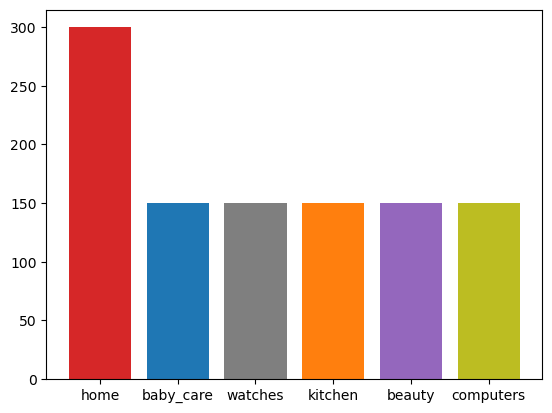

In [29]:
bar_labels = ['red', 'blue', 'gray', 'orange','purple','olive']
bar_colors = ['tab:red', 'tab:blue', 'tab:gray', 'tab:orange', 'tab:purple', 'tab:olive']
plt.bar(height = [freq_cat.home,freq_cat.baby_care, freq_cat.watches, freq_cat.kitchen, freq_cat.beauty, freq_cat.computers],
        x = ['home','baby_care','watches','kitchen','beauty','computers'] ,
        label = bar_labels, color = bar_colors)

In [30]:
df_texte.loc[df_texte.category_name == 'computers laptops','category_name'] = 'computers laptop'

In [31]:
df_texte.head()

,product_name,product_category_tree,description,brand,category_name
0,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",Key Features of Elegance Polyester Multicolor ...,Elegance,home
1,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Specifications of Sathiyas Cotton Bath Towel (...,Sathiyas,baby_care
2,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Key Features of Eurospa Cotton Terry Face Towe...,Eurospa,baby_care
3,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",Key Features of SANTOSH ROYAL FASHION Cotton P...,SANTOSH ROYAL FASHION,home
4,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",Key Features of Jaipur Print Cotton Floral Kin...,Jaipur Print,home


In [32]:
df_texte.description[0]

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [33]:
token2 = np.array(df_texte.description)
token2 = [tokenizer.tokenize(i.lower()) for i in token2]

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dragomir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
sw = set()
sw.update(tuple(nltk.corpus.stopwords.words('english')))

In [36]:
# récupère unqiuement les mots importants

descript_sw = [[idx for idx in token if idx not in sw] for token in token2]

In [37]:
freq_desc = [nltk.FreqDist(i) for i in descript_sw]

In [38]:
# analyse des mots les plus férquents pour la cat home furnishing

home_idx = df_texte.loc[df_texte.category_name == 'home',:].index
home_idx

baby_idx = df_texte.loc[df_texte.category_name == 'baby_care',:].index
baby_idx


kitchen_dining_idx = df_texte.loc[df_texte.category_name == 'kitchen',:].index
kitchen_dining_idx

beauty_idx = df_texte.loc[df_texte.category_name == 'beauty',:].index
beauty_idx

watches_idx = df_texte.loc[df_texte.category_name == 'watches',:].index
watches_idx

computers_idx = df_texte.loc[df_texte.category_name == 'computers',:].index
computers_idx




Int64Index([  47,   51,   53,   54,   55,   87,  115,  119,  122,  296,
            ...
            1019, 1021, 1023, 1024, 1025, 1028, 1032, 1034, 1035, 1036],
           dtype='int64', length=150)

In [39]:
corpus_home = [' '.join(descript_sw[idx]) for idx in home_idx]
corpus_baby = [' '.join(descript_sw[idx]) for idx in baby_idx]
corpus_kitchen_dining = [' '.join(descript_sw[idx]) for idx in kitchen_dining_idx]
corpus_beauty = [' '.join(descript_sw[idx]) for idx in beauty_idx]
corpus_watches = [' '.join(descript_sw[idx]) for idx in watches_idx]
corpus_computers = [' '.join(descript_sw[idx]) for idx in computers_idx]


In [40]:
tok_home = tokenizer.tokenize(str(corpus_home))
tok_baby = tokenizer.tokenize(str(corpus_baby))
tok_kitchen_dining = tokenizer.tokenize(str(corpus_kitchen_dining))
tok_beauty = tokenizer.tokenize(str(corpus_beauty))
tok_watches = tokenizer.tokenize(str(corpus_watches))
tok_computers = tokenizer.tokenize(str(corpus_computers))

In [41]:
# mots les plus fréquents de la catégorie home furninsh

freq_totale = nltk.Counter()

freq_totale.update(tok_home)

freq_totale.most_common(100)[:10]

[('cm', 470),
 ('rs', 268),
 ('showpiece', 204),
 ('1', 185),
 ('products', 167),
 ('buy', 159),
 ('free', 159),
 ('delivery', 151),
 ('genuine', 150),
 ('shipping', 150)]

In [42]:
# mots les plus fréquents de la catégorie baby care

freq_totale = nltk.Counter()

freq_totale.update(tok_baby)

freq_totale.most_common(100)[:10]

[('baby', 316),
 ('cotton', 191),
 ('details', 174),
 ('girl', 165),
 ('fabric', 164),
 ('1', 140),
 ('dress', 105),
 ('specifications', 100),
 ('ideal', 98),
 ('general', 96)]

In [43]:
# mots les plus fréquents de la catégorie kitchen dining

freq_totale = nltk.Counter()

freq_totale.update(tok_kitchen_dining)

freq_totale.most_common(100)[:10]

[('mug', 323),
 ('ceramic', 206),
 ('coffee', 161),
 ('perfect', 143),
 ('5', 139),
 ('rs', 139),
 ('mugs', 130),
 ('material', 119),
 ('1', 100),
 ('day', 97)]

In [44]:
# mots les plus fréquents de la catégorie beauty

freq_totale = nltk.Counter()

freq_totale.update(tok_beauty)

freq_totale.most_common(100)[:10]

[('flipkart', 163),
 ('com', 159),
 ('rs', 131),
 ('products', 128),
 ('set', 112),
 ('free', 110),
 ('30', 108),
 ('combo', 107),
 ('replacement', 105),
 ('delivery', 103)]

In [45]:
# mots les plus fréquents de la catégorie computers computer

freq_totale = nltk.Counter()

freq_totale.update(tok_computers)

freq_totale.most_common(100)[:10]

[('laptop', 214),
 ('replacement', 176),
 ('usb', 174),
 ('warranty', 159),
 ('rs', 138),
 ('adapter', 116),
 ('free', 112),
 ('battery', 106),
 ('power', 101),
 ('day', 96)]

In [46]:
# mots les plus fréquents de la catégorie computers tablet

freq_totale = nltk.Counter()

freq_totale.update(tok_watches)

freq_totale.most_common(100)[:10]

[('watch', 324),
 ('analog', 256),
 ('men', 158),
 ('rs', 140),
 ('day', 136),
 ('buy', 134),
 ('online', 134),
 ('india', 134),
 ('flipkart', 134),
 ('com', 134)]

In [47]:
# mots les plus fréquents de la catégorie watches

freq_totale = nltk.Counter()

freq_totale.update(tok_watches)

freq_totale.most_common(100)[:10]

[('watch', 324),
 ('analog', 256),
 ('men', 158),
 ('rs', 140),
 ('day', 136),
 ('buy', 134),
 ('online', 134),
 ('india', 134),
 ('flipkart', 134),
 ('com', 134)]

In [48]:
# les 100 mots les plus importants 

freq_totale = nltk.Counter()

[freq_totale.update(word) for word in descript_sw]

freq_totale.most_common(100)[:10]

[('rs', 911),
 ('products', 631),
 ('free', 618),
 ('buy', 581),
 ('delivery', 567),
 ('genuine', 564),
 ('shipping', 564),
 ('cash', 564),
 ('replacement', 559),
 ('1', 554)]

### 1.2 Récupère uniquement la racine du mot (Stemming)

In [49]:
from nltk.stem.snowball import EnglishStemmer

stemmer = EnglishStemmer()



In [50]:
data_stem = [stemmer.stem(str(i)) for i in descript_sw]
data_stem[0][:100]

"['key', 'features', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', "

In [51]:
# récupère la racine du mot

stem_word = [''.join(stemword) for stemword in data_stem]

#corpus_text = [' '.join(tokens) for tokens in descipt_sw]

In [52]:
stem_word[:1]

["['key', 'features', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', '213', 'cm', 'height', 'pack', '2', 'price', 'rs', '899', 'curtain', 'enhances', 'look', 'interiors', 'curtain', 'made', '100', 'high', 'quality', 'polyester', 'fabric', 'features', 'eyelet', 'style', 'stitch', 'metal', 'ring', 'makes', 'room', 'environment', 'romantic', 'loving', 'curtain', 'ant', 'wrinkle', 'anti', 'shrinkage', 'elegant', 'apparance', 'give', 'home', 'bright', 'modernistic', 'appeal', 'designs', 'surreal', 'attention', 'sure', 'steal', 'hearts', 'contemporary', 'eyelet', 'valance', 'curtains', 'slide', 'smoothly', 'draw', 'apart', 'first', 'thing', 'morning', 'welcome', 'bright', 'sun', 'rays', 'want', 'wish', 'good', 'morning', 'whole', 'world', 'draw', 'close', 'evening', 'create', 'special', 'moments', 'joyous', 'beauty', 'given', 'soothing', 'prints', 'bring', 'ho

In [53]:
corpus_text = [' '.join(tokens) for tokens in descript_sw]
corpus_text[0]

'key features elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain 213 cm height pack 2 price rs 899 curtain enhances look interiors curtain made 100 high quality polyester fabric features eyelet style stitch metal ring makes room environment romantic loving curtain ant wrinkle anti shrinkage elegant apparance give home bright modernistic appeal designs surreal attention sure steal hearts contemporary eyelet valance curtains slide smoothly draw apart first thing morning welcome bright sun rays want wish good morning whole world draw close evening create special moments joyous beauty given soothing prints bring home elegant curtain softly filters light room get right amount sunlight specifications elegance polyester multicolor abstract eyelet door curtain 213 cm height pack 2 general brand elegance designed door type eyelet model name abstract polyester door curtain set 2 model id duster25 color multicolor d

In [54]:
stem_word_txt = []
_ = [stem_word_txt.append(str(txt).replace("'", '').replace(",","").replace("[",'').replace("]",'')) for txt in stem_word]
print('Max sentence length: ', max([len(sen) for sen in stem_word_txt]))

Max sentence length:  2650


In [55]:
# Comparaison après avoir retirer les stop words

len(df_texte.description[0]),len(stem_word_txt[0])

(1420, 1119)

### 2 Bag of words Méthode tf-idf

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

tfidf

TfidfVectorizer()

In [57]:
corpus_text[0:1]

['key features elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain 213 cm height pack 2 price rs 899 curtain enhances look interiors curtain made 100 high quality polyester fabric features eyelet style stitch metal ring makes room environment romantic loving curtain ant wrinkle anti shrinkage elegant apparance give home bright modernistic appeal designs surreal attention sure steal hearts contemporary eyelet valance curtains slide smoothly draw apart first thing morning welcome bright sun rays want wish good morning whole world draw close evening create special moments joyous beauty given soothing prints bring home elegant curtain softly filters light room get right amount sunlight specifications elegance polyester multicolor abstract eyelet door curtain 213 cm height pack 2 general brand elegance designed door type eyelet model name abstract polyester door curtain set 2 model id duster25 color multicolor 

In [58]:
sparse = tfidf.fit_transform(stem_word_txt)

In [59]:
print('tous les mots que lon trouve dans l enselble des textes')

tfidf.get_feature_names_out(), tfidf.get_feature_names_out().shape

tous les mots que lon trouve dans l enselble des textes


(array(['00', '000', '001', ..., 'zoom', 'zora', 'zyxel'], dtype=object),
 (5940,))

In [60]:
length_corpus = []
_ = [length_corpus.append(len(i)) for i in corpus_text]
max(length_corpus), min(length_corpus)

(2650, 71)

In [61]:
print('taille de la matrice creuse : ',sparse.toarray().shape)

taille de la matrice creuse :  (1050, 5940)


In [62]:
sparse.data

array([0.02728972, 0.0316754 , 0.03879217, ..., 0.06583828, 0.07411083,
       0.04760895])

In [63]:
tfidf.vocabulary_['curtains']

1906

In [64]:
#tfidf.get_feature_names()

<AxesSubplot:>

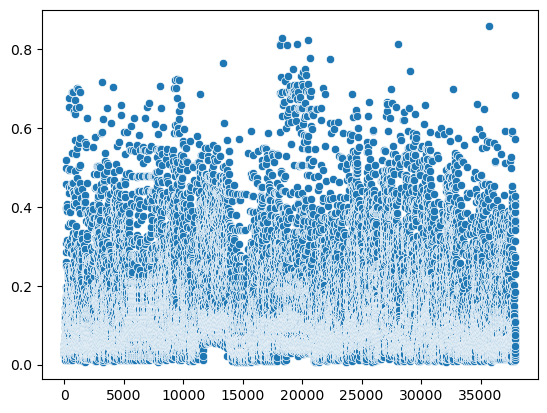

In [65]:
sns.scatterplot(data = sparse.data)

In [66]:
tfidf.vocabulary_['key']

3237

In [67]:

X = sparse

X.min(), X.max()

(0.0, 0.8576555821864287)

In [68]:
from sklearn import preprocessing


# preprocessing encodage des données
encodage = preprocessing.LabelEncoder()
encodage.fit(df_texte.category_name)
df_texte["label_cat1"] = encodage.transform(df_texte.category_name)
# data.head(5)
df_texte.category_name.value_counts()

home         300
baby_care    150
watches      150
kitchen      150
beauty       150
computers    150
Name: category_name, dtype: int64

## 3 Faisabilité de la classification texte
### 3.1 Comparaison des données avec TSNE

In [69]:
from sklearn.manifold import TSNE

import time

tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, init='random', random_state=6)

# mrtrice creuse des documents vectorisés avec la méthode td-idf

X = sparse

print('X : ',X.shape)

temps1 = time.time()

X_tsne = tsne.fit_transform(X)

duration1=time.time()-temps1

print("temps de T-SNE : ", "%15.2f" % duration1, "secondes")

X :  (1050, 5940)
temps de T-SNE :             4.43 secondes


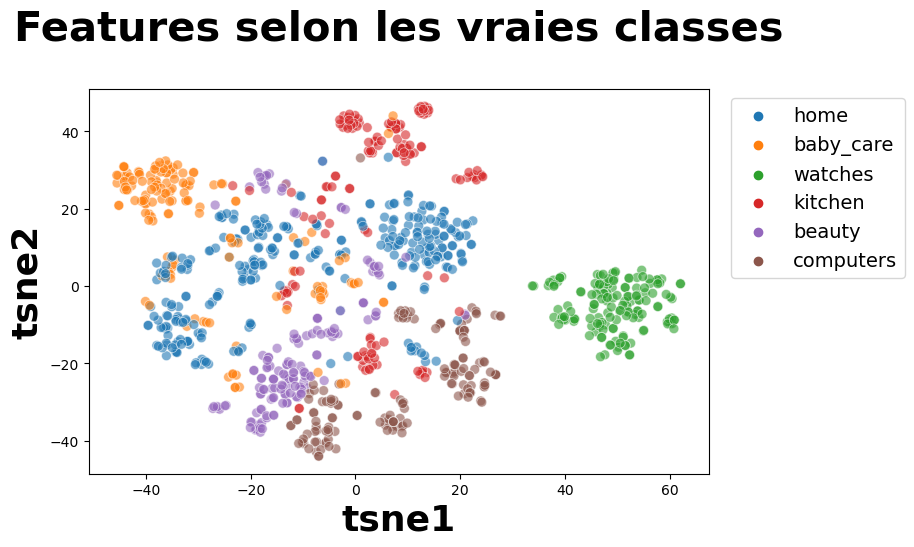

In [70]:
df_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
df_tsne["class"] = df_texte.category_name

plt.figure(figsize=(8,5))

sns.scatterplot(
    data=df_tsne,
    x="tsne1", 
    y="tsne2",
    hue="class",
    palette=sns.color_palette('tab10', n_colors=6),
    s=50,
    alpha=0.6,
    legend="brief")

plt.title('Features selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}, bbox_to_anchor=(1.02, 1)) 

plt.show()

#### Kmeans 

In [71]:
#df['cluster'] = model.labels_

from sklearn.cluster import KMeans

X = df_tsne[['tsne1','tsne2']]
model = KMeans(n_clusters=6, init='k-means++')
model.fit(X)
df_tsne['cluster' ] = model.labels_

C:\Users\Dragomir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dragomir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


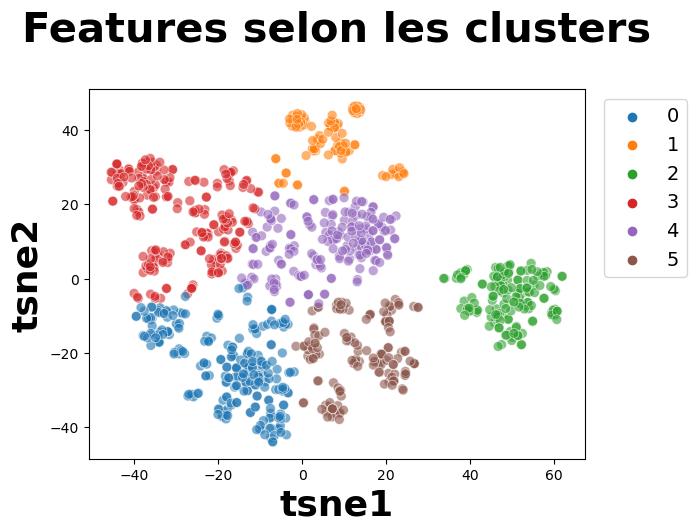

In [72]:
sns.scatterplot(
    data=df_tsne,
    x="tsne1", 
    y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=6),
    s=50,
    alpha=0.6,
    legend="brief")
plt.title('Features selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}, bbox_to_anchor=(1.02, 1)) 

plt.show()

In [73]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(df_texte.label_cat1,df_tsne.cluster)

0.3866660155269086

In [74]:
from sklearn.metrics import confusion_matrix, classification_report


y_true, y_pred = df_texte.label_cat1, df_tsne.cluster

confusion_matrix = confusion_matrix(y_true , y_pred)

confusion_matrix

array([[ 19,   2,   0, 109,  20,   0],
       [110,   1,   0,  16,  18,   5],
       [ 48,   1,   0,   0,   0, 101],
       [ 60,   4,   0,  92, 132,  12],
       [  5,  93,   0,   3,  19,  30],
       [  0,   0, 150,   0,   0,   0]], dtype=int64)

In [75]:
pd.DataFrame(confusion_matrix, index=['label_true_0',
                                      'label_true_1',
                                      'label_true_2',
                                      'label_true_3',
                                      'label_true_4',
                                      'label_true_5'],
                             columns=['label_pred_0',
                                      'label_pred_1',
                                      'label_pred_2',
                                      'label_pred_3',
                                      'label_pred_4',
                                      'label_pred_5']) 

,label_pred_0,label_pred_1,label_pred_2,label_pred_3,label_pred_4,label_pred_5
label_true_0,19,2,0,109,20,0
label_true_1,110,1,0,16,18,5
label_true_2,48,1,0,0,0,101
label_true_3,60,4,0,92,132,12
label_true_4,5,93,0,3,19,30
label_true_5,0,0,150,0,0,0


In [76]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.08      0.13      0.10       150
           1       0.01      0.01      0.01       150
           2       0.00      0.00      0.00       150
           3       0.42      0.31      0.35       300
           4       0.10      0.13      0.11       150
           5       0.00      0.00      0.00       150

    accuracy                           0.12      1050
   macro avg       0.10      0.09      0.10      1050
weighted avg       0.15      0.12      0.13      1050



### 3.2 classification supervisée Grid SearchCV

In [77]:
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

def create_pipeline_evaluate_model(index_fold, X_train, X_test, y_train, y_test,idx_train,idx_test):
    
        model = Pipeline([
                         ("classifier",SVC())
                         ])

        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        score = model.score(X_test,y_test)     
        print(f"Run {index_fold} : score = {round(score,2)} ")
        return (score)

In [78]:
from sklearn.model_selection import KFold
nb_model = 5
index_fold = 0
kf = KFold(n_splits=nb_model, shuffle=False)
average_score = 0

X = sparse
y = df_texte.label_cat1

kf = KFold(n_splits=nb_model)

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    score = create_pipeline_evaluate_model(index_fold, X_train, X_test, y_train, y_test,train_index,test_index)    
    average_score += score
    index_fold += 1
    
average_score = average_score / nb_model
print(average_score)

Run 0 : score = 0.58 
Run 1 : score = 0.36 
Run 2 : score = 0.83 
Run 3 : score = 0.66 
Run 4 : score = 0.64 
0.6123809523809524


In [79]:
pipe = Pipeline([('Tfidf', TfidfVectorizer(smooth_idf=False,norm='l2')),
                ("estimator",DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0))
                ])
pipe

Pipeline(steps=[('Tfidf', TfidfVectorizer(smooth_idf=False)),
                ('estimator', DecisionTreeClassifier(random_state=0))])

In [80]:
X = sparse
y = df_texte.label_cat1

param_grid = {'Tfidf':[TfidfVectorizer(smooth_idf=False,norm='l2'),TfidfVectorizer()],
              'estimator':[RandomForestClassifier(), 
                          ExtraTreesClassifier(), 
                          DecisionTreeClassifier(),
                          SVC(),
                          BaggingClassifier(),
                          KNeighborsClassifier(13),
                          LogisticRegression()
                          ]}

X = corpus_text

In [81]:
# test avec 6 classes 

from sklearn.model_selection import train_test_split, GridSearchCV


X = sparse
y = df_texte.label_cat1

param_grid = {'Tfidf':[TfidfVectorizer(smooth_idf=False,norm='l2'),TfidfVectorizer()],
              'estimator':[RandomForestClassifier(),
                           AdaBoostClassifier(),
                           GradientBoostingClassifier(),
                           ExtraTreesClassifier(),
                           DecisionTreeClassifier(),
                           SVC(),
                           BaggingClassifier(),
                           KNeighborsClassifier(13),
                           LogisticRegression()
                          ]}

X = corpus_text

grid = GridSearchCV(pipe,param_grid=param_grid, cv=10,return_train_score=True ,n_jobs=-1, verbose=1)

grid.fit(X,y)

grid_cv = pd.DataFrame(grid.cv_results_)

new_cols = [i for i in grid_cv.columns if 'split' not in i.lower()]

grid_cv.loc[:,new_cols].sort_values('mean_test_score', ascending=False)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Tfidf,param_estimator,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
17,0.754632,0.126402,0.017755,0.003775,TfidfVectorizer(),LogisticRegression(),"{'Tfidf': TfidfVectorizer(), 'estimator': Logi...",0.877143,0.103231,1,0.974709,0.003460
12,5.033643,0.750637,0.043163,0.010696,TfidfVectorizer(),ExtraTreesClassifier(),"{'Tfidf': TfidfVectorizer(), 'estimator': Extr...",0.876190,0.079909,2,1.000000,0.000000
8,0.635354,0.090905,0.015653,0.004735,TfidfVectorizer(smooth_idf=False),LogisticRegression(),"{'Tfidf': TfidfVectorizer(smooth_idf=False), '...",0.875238,0.107027,3,0.975450,0.003690
2,73.054329,6.315452,0.019566,0.007183,TfidfVectorizer(smooth_idf=False),GradientBoostingClassifier(),"{'Tfidf': TfidfVectorizer(smooth_idf=False), '...",0.868571,0.086221,4,1.000000,0.000000
11,70.816661,2.810058,0.016254,0.004466,TfidfVectorizer(),GradientBoostingClassifier(),"{'Tfidf': TfidfVectorizer(), 'estimator': Grad...",0.867619,0.087126,5,1.000000,0.000000
14,0.999019,0.117317,0.074225,0.011512,TfidfVectorizer(),SVC(),"{'Tfidf': TfidfVectorizer(), 'estimator': SVC()}",0.859048,0.107817,6,0.998307,0.000518
3,5.371080,0.963173,0.046363,0.015325,TfidfVectorizer(smooth_idf=False),ExtraTreesClassifier(),"{'Tfidf': TfidfVectorizer(smooth_idf=False), '...",0.855238,0.111049,7,1.000000,0.000000
5,0.912206,0.182257,0.072921,0.011759,TfidfVectorizer(smooth_idf=False),SVC(),"{'Tfidf': TfidfVectorizer(smooth_idf=False), '...",0.855238,0.110640,7,0.998413,0.000710
15,3.961270,0.427888,0.028157,0.008179,TfidfVectorizer(),BaggingClassifier(),"{'Tfidf': TfidfVectorizer(), 'estimator': Bagg...",0.852381,0.109275,9,0.996085,0.002321
0,3.527220,0.156191,0.033908,0.004814,TfidfVectorizer(smooth_idf=False),RandomForestClassifier(),"{'Tfidf': TfidfVectorizer(smooth_idf=False), '...",0.851429,0.112784,10,1.000000,0.000000


In [82]:
pipe = Pipeline([
                ("estimator",SVC(kernel = 'linear'))
                ])
pipe

Pipeline(steps=[('estimator', SVC(kernel='linear'))])

In [83]:
sparse

<1050x5940 sparse matrix of type '<class 'numpy.float64'>'
	with 37922 stored elements in Compressed Sparse Row format>

In [84]:
param_grid = {'kernel':['poly', 'rbf', 'sigmoid'],
              'gamma' : [0.0001, 0.001, 0.005, 0.01, 1, 10],
              'C' : [0.1,1,5,10,50,100]}
param_grid

X = sparse

from sklearn.model_selection import train_test_split, GridSearchCV


grid = GridSearchCV(SVC(),param_grid=param_grid, cv=10,return_train_score=True ,n_jobs=-1, verbose=1)

grid

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.005, 0.01, 1, 10],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             return_train_score=True, verbose=1)

In [85]:
grid.fit(X,y)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.005, 0.01, 1, 10],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             return_train_score=True, verbose=1)

In [86]:
grid_cv = pd.DataFrame(grid.cv_results_)

new_cols = [i for i in grid_cv.columns if 'split' not in i.lower()]

grid_cv.loc[:,new_cols].sort_values('mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
100,0.684205,0.085948,0.051968,0.007672,100,0.01,rbf,"{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}",0.895238,0.093895,1,0.998519,0.00097
50,0.597836,0.072953,0.046212,0.007975,5,1,sigmoid,"{'C': 5, 'gamma': 1, 'kernel': 'sigmoid'}",0.894286,0.090296,2,0.998942,0.00082
68,0.633608,0.083098,0.052823,0.010824,10,1,sigmoid,"{'C': 10, 'gamma': 1, 'kernel': 'sigmoid'}",0.893333,0.089827,3,1.000000,0.00000
86,0.617467,0.096178,0.052065,0.012581,50,1,sigmoid,"{'C': 50, 'gamma': 1, 'kernel': 'sigmoid'}",0.891429,0.087929,4,1.000000,0.00000
104,0.586352,0.065705,0.046412,0.010838,100,1,sigmoid,"{'C': 100, 'gamma': 1, 'kernel': 'sigmoid'}",0.891429,0.087929,4,1.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,0.702788,0.098625,0.066923,0.015221,5,0.0001,sigmoid,"{'C': 5, 'gamma': 0.0001, 'kernel': 'sigmoid'}",0.285714,0.000000,56,0.285714,0.00000
37,0.702341,0.065716,0.067174,0.014134,5,0.0001,rbf,"{'C': 5, 'gamma': 0.0001, 'kernel': 'rbf'}",0.285714,0.000000,56,0.285714,0.00000
36,0.711478,0.099338,0.070920,0.012074,5,0.0001,poly,"{'C': 5, 'gamma': 0.0001, 'kernel': 'poly'}",0.285714,0.000000,56,0.285714,0.00000
29,0.947871,0.182869,0.077328,0.024756,1,0.01,sigmoid,"{'C': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}",0.285714,0.000000,56,0.285714,0.00000


In [87]:
sparse.toarray().shape

(1050, 5940)

In [88]:
svc = SVC(kernel = 'rbf',gamma = 0.1, C = 100)
X = sparse
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)


In [89]:
y_true = df_texte.label_cat1[y_test.index]

y_true

242    4
462    3
967    0
454    4
733    2
      ..
870    3
647    0
823    5
505    5
887    1
Name: label_cat1, Length: 210, dtype: int32

In [90]:
dico = dict({"category_true" :y_true, "category_pred" : y_pred})

In [91]:
df_confu = pd.DataFrame(dico)
#df_confu.loc[df_confu.category_pred == 0]

In [92]:
df_texte.category_name.unique()

array(['home', 'baby_care', 'watches', 'kitchen', 'beauty', 'computers'],
      dtype=object)

In [93]:
pd.Series(y_pred).value_counts().sort_values()
idx = y_true.value_counts().index
idx_true = np.sort(idx)

In [94]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix = confusion_matrix(y_true, y_pred)


In [95]:
pd.Series(y_pred).value_counts().sort_values()

0    21
1    22
2    28
5    29
4    32
3    78
dtype: int64

In [96]:
pd.DataFrame(confusion_matrix, index=[idx_true],
                             columns=[idx_true]) 

,0,1,2,3,4,5
0,21,0,0,7,0,0
1,0,22,0,6,0,0
2,0,0,28,0,0,0
3,0,0,0,58,0,0
4,0,0,0,6,32,0
5,0,0,0,1,0,29


In [97]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        28
           1       1.00      0.79      0.88        28
           2       1.00      1.00      1.00        28
           3       0.74      1.00      0.85        58
           4       1.00      0.84      0.91        38
           5       1.00      0.97      0.98        30

    accuracy                           0.90       210
   macro avg       0.96      0.89      0.91       210
weighted avg       0.93      0.90      0.91       210

